In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('googleplaystore.csv')


In [3]:
data.drop_duplicates(inplace=True)


In [5]:
# Clean 'Installs' column
data['Installs'] = data['Installs'].str.replace('+', '', regex=False).str.replace(',', '')

# Handle non-numeric entries
data = data[data['Installs'].str.isnumeric()]  # Keep only rows where 'Installs' is numeric
data['Installs'] = data['Installs'].astype(float)

In [6]:
data['Price'] = data['Price'].str.replace('$', '', regex=False).astype(float)


In [7]:
data['Reviews'] = data['Reviews'].astype(float)


In [8]:
data['Rating'].fillna(data['Rating'].median(), inplace=True)


C:\Users\User\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


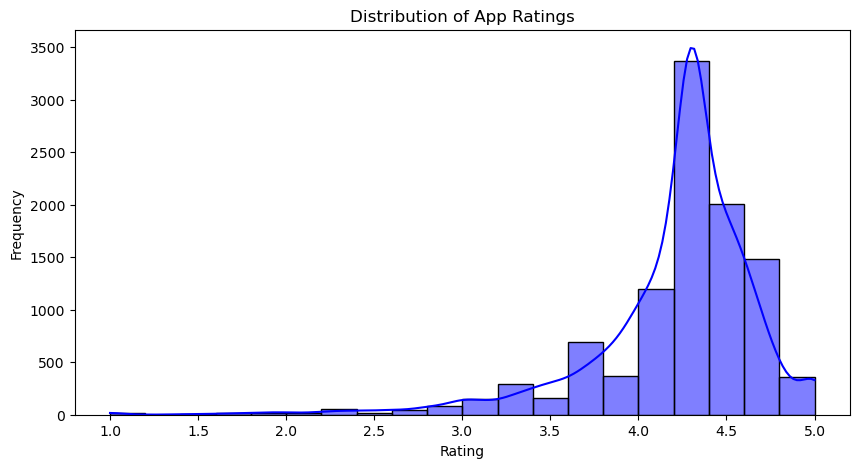

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

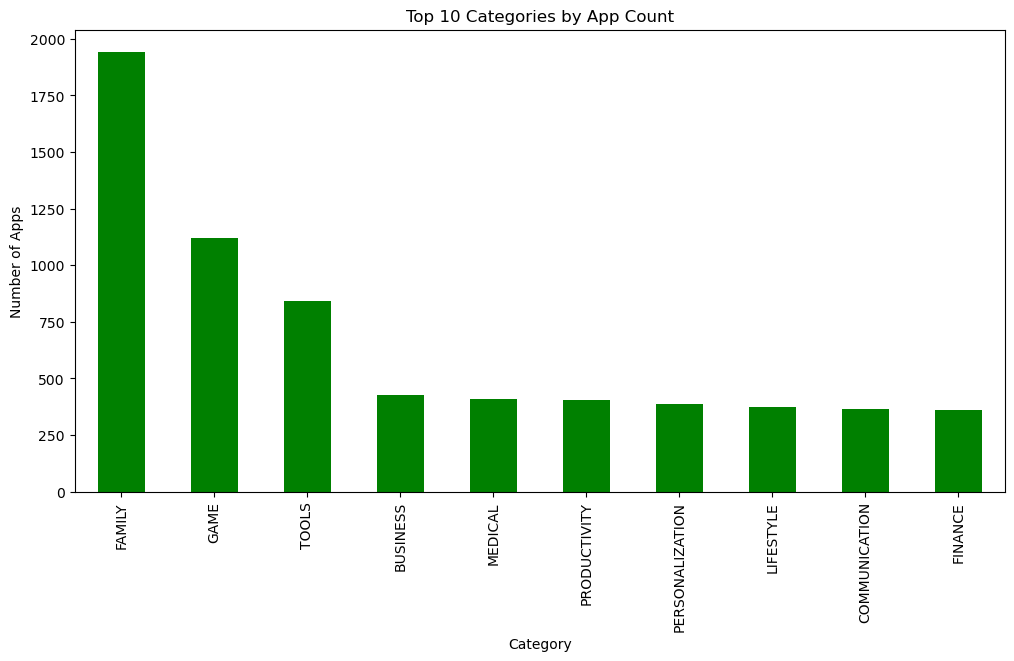

In [10]:
plt.figure(figsize=(12, 6))
data['Category'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Categories by App Count')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

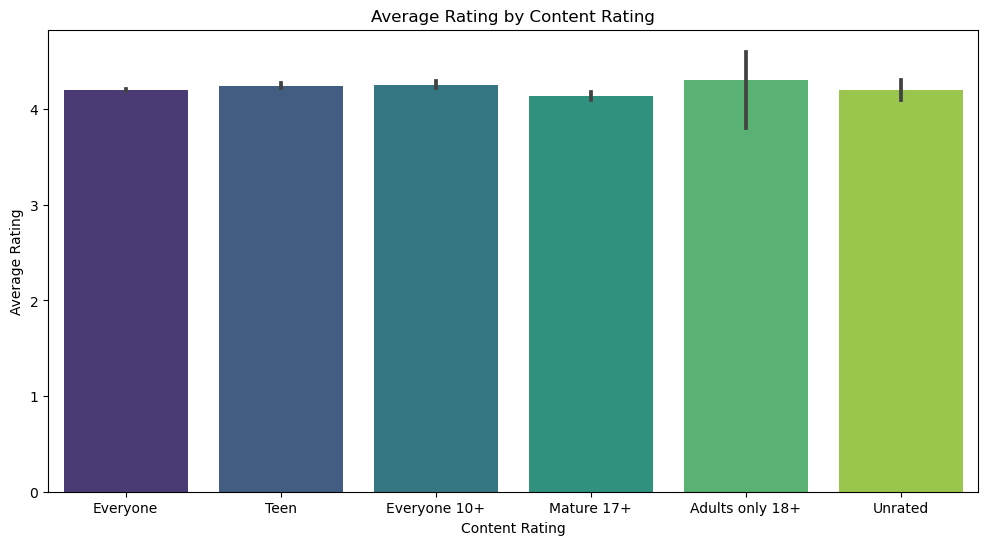

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Content Rating', y='Rating', data=data, palette='viridis')
plt.title('Average Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Rating')
plt.show()

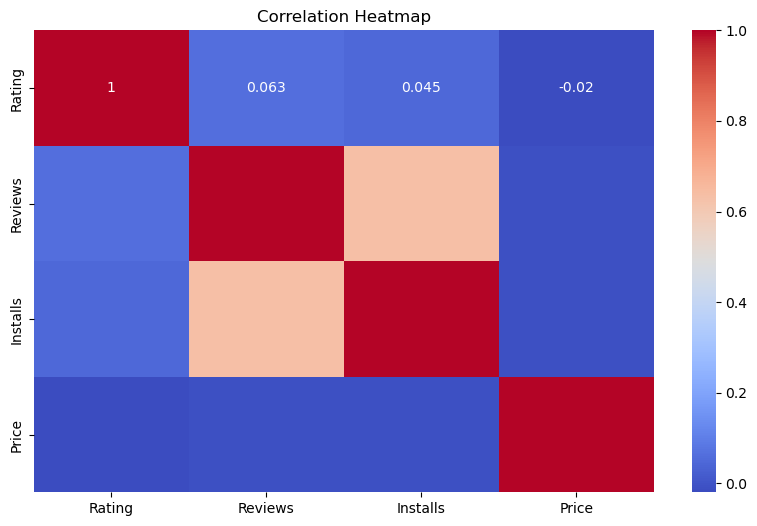

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[['Rating', 'Reviews', 'Installs', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

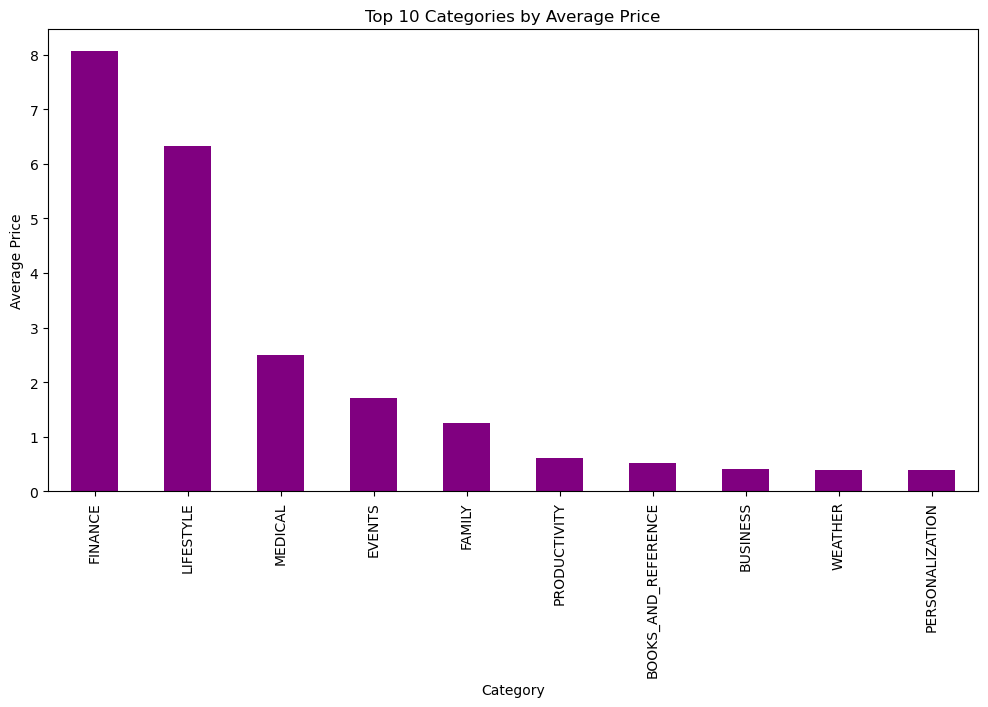

In [13]:
avg_price_by_category = data.groupby('Category')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_price_by_category.plot(kind='bar', color='purple')
plt.title('Top 10 Categories by Average Price')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()